## Ejercicio manejo de datos y Limpieza

 - Importa los datos de FIFA.csv, Contienen información de jugadores de futbol
 - Realiza una limpieza de datos:
   - ¿De qué formato son nuestras variables? ¿cuántas líneas y columnas tiene el dataset?
   - Cambia las medidas de las variables Weight y Height a Kg y cm
   - Elimina el "+1", "+2"... de las variables CDM, RDM... y todas las columnas que están al final, sin tener que ir una por una. Apóyate en métodos como split, replace...
   - Arregla también las variables W/F, SM, IR
   - Para posteriormente hacer un buen análisis de datos por posición del jugador sería recomendable agrupar o normalizar las posiciones (BP, Best Position) en Portero, Defensa, Mediocampista y delantero. Quizás lo mejor sería crear una función posiciones_jugadores y dependiendo de la BP de cada uno que la nueva variable tome uno de esos 4 valores.
   - También vamos a querer calcular algunas métricas sobre el valor de los jugadores, Transforma las variables Value y Wage de manera que sea un entero y podamos calcular la suma y la media por equipo, posición, nacionalidad...
 - Tratamiento de valores nulos:
   - Localiza las variables que tienen valores nulos y cuenta cuántos tiene cada una de ellas
   - Decide qué hacer con ellos, si eliminarlos, imputarles un valor fijo, imputarles un valor en función de alguna condición...
 - Valores extremos
   - Localiza si las variables numéricas toman valores demasiado elevados o bajos, usa la función describe y pinta gráficos
   - Si existe alguno que sea absurdo (por ejemplo una altura en negativo) corrígelo. Si no, trátalo de la manera que más nos convenga para un futuro análisis exploratorio, por ejemplo limítalo a un valor más bajo.
 - Análisis descriptivo
   - Una vez tenemos nuestros datos limpios de irregularidades, de valores nulos y erróneos podemos emepezar a analizar su contenido
   - Compara las variables numéricas en función de variables categóricas, como su posición. Respóndete a preguntas tales como qué jugadores son más caros, más altos... Para ello representa una tabla con la suma, la media y la cuenta para cada posición. También dibuja un gráfico que consideres el más conveniente para analizar la misma información visualmente. 
   - OVA representa una valoración general del jugador, analiza si tiene alguna relación con otras columnas referentes a la calidad como Attacking, Defending... A mayor OVA mayor Value?

In [2]:
import pandas as pd

In [3]:
df_fifa = pd.read_csv('../Data/fifa.csv')
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [4]:
#Cambia las medidas de las variables Weight y Height a Kg y cm
df_fifa['Weight_kg'] = df_fifa['Weight'].str.replace('lbs', '', regex=False).astype(float)*0.453592

df_fifa['Height_cm'] = df_fifa['Height'].str.replace("'", '.', regex=False).str.replace('"', '', regex=False).astype(float)*30.48


df_fifa[['Weight','Weight_kg','Height_cm','Height']]

,Weight,Weight_kg,Height_cm,Height
0,161lbs,73.028312,179.8320,"5'9"""
1,159lbs,72.121128,182.8800,"6'0"""
2,134lbs,60.781328,164.5920,"5'4"""
3,152lbs,68.945984,155.4480,"5'10"""
4,150lbs,68.038800,155.7528,"5'11"""
...,...,...,...,...
13695,143lbs,64.863656,176.7840,"5'8"""
13696,176lbs,79.832192,198.1200,"6'5"""
13697,146lbs,66.224432,173.7360,"5'7"""
13698,176lbs,79.832192,155.7528,"5'11"""


In [5]:
df_fifa.shape

(13700, 104)

In [6]:
df_fifa.columns



Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Club', 'BP',
       'Position', 'Team & Contract', 'Height',
       ...
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'OVA', 'Weight_kg',
       'Height_cm'],
      dtype='object', length=104)

In [7]:
df_fifa.columns[3:]

Index(['Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Growth',
       ...
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'OVA', 'Weight_kg',
       'Height_cm'],
      dtype='object', length=101)

In [8]:
df_fifa[[ 'LS', 'ST', 'RS', 'LW', 'LF','CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
       'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK']]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,...,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1
1,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,...,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2
2,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,...,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2
3,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,...,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2
4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,...,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,44+2,44+2,44+2,51+0,48+0,48+0,48+0,51+0,48+2,48+2,...,52+2,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2
13696,22+2,22+2,22+2,20+0,22+0,22+0,22+0,20+0,23+2,23+2,...,23+2,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2
13697,67+2,67+2,67+2,74+0,73+0,73+0,73+0,74+0,76+0,76+0,...,60+2,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2
13698,55+2,55+2,55+2,56+0,55+0,55+0,55+0,56+0,57+2,57+2,...,62+1,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2


In [9]:
# Elimina el "+1", "+2"... de las variables CDM, RDM... y todas las columnas que están al final, sin tener que ir una por una. Apóyate en métodos como split, replace...
x = [ 'LS', 'ST', 'RS', 'LW', 'LF','CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM','LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK']

for i in x:
    df_fifa[i] = df_fifa[i].fillna('0+0').astype(str)
    df_fifa[i] = df_fifa[i].apply(lambda x: x if '+' in x else x + '+0')
    
    df_fifa[[f"{i}_ok",f"{i}_+"]] = df_fifa[i].str.split('+', expand=True)
    df_fifa.drop(columns=[f"{i}_+"])

df_fifa[['CB','CB_ok','CB_+']].head(10)



,CB,CB_ok,CB_+
0,54+1,54,1
1,48+2,48,2
2,41+2,41,2
3,58+2,58,2
4,61+2,61,2
5,49+2,49,2
6,74+2,74,2
7,46+2,46,2
8,68+-3,68,-3
9,68+-1,68,-1


In [10]:
df_fifa[['LS_ok','+']] = df_fifa['LS'].str.split('+', expand=True)
df_fifa[['LS_ok']]

,LS_ok
0,58
1,77
2,73
3,50
4,56
...,...
13695,44
13696,22
13697,67
13698,55


In [11]:
# Arregla también las variables W/F, SM, IR


df_fifa['W/F_ok'] = df_fifa['W/F'].str.replace('★', '', regex=False).astype(float)
df_fifa['SM_ok'] = df_fifa['SM'].str.replace('★', '', regex=False).astype(float)
df_fifa['IR_ok'] = df_fifa['IR'].str.replace('★', '', regex=False).astype(float)

df_fifa[['W/F', 'SM', 'IR','W/F_ok', 'SM_ok', 'IR_ok']]

,W/F,SM,IR,W/F_ok,SM_ok,IR_ok
0,4 ★,2★,1 ★,4.0,2.0,1.0
1,3 ★,4★,2 ★,3.0,4.0,2.0
2,4 ★,4★,2 ★,4.0,4.0,2.0
3,2 ★,2★,1 ★,2.0,2.0,1.0
4,2 ★,3★,1 ★,2.0,3.0,1.0
...,...,...,...,...,...,...
13695,3 ★,2★,1 ★,3.0,2.0,1.0
13696,2 ★,1★,1 ★,2.0,1.0,1.0
13697,4 ★,4★,2 ★,4.0,4.0,2.0
13698,3 ★,2★,1 ★,3.0,2.0,1.0


In [12]:
try:
    df_fifa[['W/F', 'SM', 'IR']] = df_fifa[['W/F', 'SM', 'IR']].apply(lambda x: x.str.replace(' ', '', regex=False))
    df_fifa[['W/F', 'SM', 'IR']] = df_fifa[['W/F', 'SM', 'IR']].apply(lambda x: x.str.replace('★', '', regex=False)).astype(int)
except:
    None
df_fifa[['W/F', 'SM', 'IR']]

,W/F,SM,IR
0,4,2,1
1,3,4,2
2,4,4,2
3,2,2,1
4,2,3,1
...,...,...,...
13695,3,2,1
13696,2,1,1
13697,4,4,2
13698,3,2,1


In [13]:
# Para posteriormente hacer un buen análisis de datos por posición del jugador sería recomendable agrupar o normalizar las posiciones 
# (BP, Best Position) en Portero, Defensa, Mediocampista y delantero. Quizás lo mejor sería crear una función posiciones_jugadores y 
# dependiendo de la BP de cada uno que la nueva variable tome uno de esos 4 valores.

#df_fifa['BP'].unique()

# Portero, Defensa, Mediocampista y delantero
posiciones_jugadores = [
                        ['BP', 'Best Position'],
                        ['CM', 'Mediocampista'],
                        ['ST', 'Delantero'],
                        ['CAM', 'Mediocampista'],
                        ['CDM', 'Mediocampista'],
                        ['LM', 'Mediocampista'],
                        ['RB', 'Defensa'],
                        ['CB', 'Defensa'],
                        ['RM', 'Mediocampista'],
                        ['GK', 'Portero'],  
                        ['LB', 'Defensa'],
                        ['RW', 'Delantero'],
                        ['LWB', 'Mediocampista'],
                        ['LW', 'Delantero'],
                        ['RWB', 'Mediocampista'],
                        ['CF', 'Delantero'] 
                        ]


df_posiciones = pd.DataFrame(posiciones_jugadores, columns=['BP', 'Best_Position'])

df_posiciones





,BP,Best_Position
0,BP,Best Position
1,CM,Mediocampista
2,ST,Delantero
3,CAM,Mediocampista
4,CDM,Mediocampista
5,LM,Mediocampista
6,RB,Defensa
7,CB,Defensa
8,RM,Mediocampista
9,GK,Portero


In [14]:

def clasificar_posicion(bp):
    posiciones = {
        'Portero': ['GK'],
        'Defensa': ['RB', 'CB', 'LB', 'LWB', 'RWB'],
        'Mediocampista': ['CM', 'CAM', 'CDM', 'LM', 'RM'],
        'Delantero': ['ST', 'CF', 'RW', 'LW']
                                                }
    
    for categoria, lista_posiciones in posiciones.items():
        if bp in lista_posiciones:
            return categoria
    return 'Desconocido'


In [15]:
df_fifa['Categoría_Posición'] = df_fifa['BP'].apply(clasificar_posicion)

df_fifa[['BP','Categoría_Posición']]

,BP,Categoría_Posición
0,CM,Mediocampista
1,ST,Delantero
2,CAM,Mediocampista
3,CDM,Mediocampista
4,CDM,Mediocampista
...,...,...
13695,LB,Defensa
13696,GK,Portero
13697,RM,Mediocampista
13698,CDM,Mediocampista


In [16]:
# También vamos a querer calcular algunas métricas sobre el valor de los jugadores, Transforma las variables Value y Wage
# de manera que sea un entero y podamos calcular la suma y la media por equipo, posición, nacionalidad

df_fifa [['Value_0','multiplo']] = df_fifa['Value'].str.replace("€","", regex=False).str.replace('K','*1000', regex=False).str.replace('M', '*1000000', regex=False).str.split('*', expand=True).astype(float)

df_fifa ['Value_ok'] = df_fifa['Value_0'] * df_fifa['multiplo']

df_fifa['Value_ok'].fillna(df_fifa['Value_0'], inplace=True)

df_fifa [['Wage_0','multiplo_0']] = df_fifa['Wage'].str.replace("€","", regex=False).str.replace('K','*1000', regex=False).str.replace('M', '*1000000', regex=False).str.split('*', expand=True).astype(float)

df_fifa ['Wage_ok'] = df_fifa['Wage_0'] * df_fifa['multiplo_0']

df_fifa['Wage_ok'].fillna(df_fifa['Wage_0'], inplace=True)



#df_fifa['Height_cm'] = df_fifa['Height'].str.replace("'", '.', regex=False).str.replace('"', '', regex=False).astype(float)*30.48

df_fifa [[
        'Value','Value_0','multiplo','Value_ok'
        ,'Wage','Wage_0','multiplo_0','Wage_ok'
         ]]


C:\Users\manue\AppData\Local\Temp\ipykernel_25100\3846886134.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fifa [['Wage_0','multiplo_0']] = df_fifa['Wage'].str.replace("€","", regex=False).str.replace('K','*1000', regex=False).str.replace('M', '*1000000', regex=False).str.split('*', expand=True).astype(float)
C:\Users\manue\AppData\Local\Temp\ipykernel_25100\3846886134.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fifa ['Wage_ok'] = df_fifa['Wage_0'] * df_fifa['multiplo_0']


,Value,Value_0,multiplo,Value_ok,Wage,Wage_0,multiplo_0,Wage_ok
0,€525K,525.0,1000.0,525000.0,€4K,4.0,1000.0,4000.0
1,€8.5M,8.5,1000000.0,8500000.0,€23K,23.0,1000.0,23000.0
2,€9M,9.0,1000000.0,9000000.0,€49K,49.0,1000.0,49000.0
3,€275K,275.0,1000.0,275000.0,€4K,4.0,1000.0,4000.0
4,€725K,725.0,1000.0,725000.0,€2K,2.0,1000.0,2000.0
...,...,...,...,...,...,...,...,...
13695,€325K,325.0,1000.0,325000.0,€1K,1.0,1000.0,1000.0
13696,€190K,190.0,1000.0,190000.0,€700,700.0,NaN,700.0
13697,€8M,8.0,1000000.0,8000000.0,€9K,9.0,1000.0,9000.0
13698,€140K,140.0,1000.0,140000.0,€4K,4.0,1000.0,4000.0


In [17]:
df_fifa [['Wage_0','multiplo_0']] = df_fifa['Wage'].str.replace("€","", regex=False).str.replace('K','*1000', regex=False).str.replace('M', '*1000000', regex=False).str.split('*', expand=True).astype(float)

df_fifa ['Wage_ok'] = df_fifa['Wage_0'] * df_fifa['multiplo_0']

df_fifa['Wage_ok'].fillna(df_fifa['Wage_0'], inplace=True)

df_fifa [['Wage','Wage_0','multiplo_0','Wage_ok']]

,Wage,Wage_0,multiplo_0,Wage_ok
0,€4K,4.0,1000.0,4000.0
1,€23K,23.0,1000.0,23000.0
2,€49K,49.0,1000.0,49000.0
3,€4K,4.0,1000.0,4000.0
4,€2K,2.0,1000.0,2000.0
...,...,...,...,...
13695,€1K,1.0,1000.0,1000.0
13696,€700,700.0,NaN,700.0
13697,€9K,9.0,1000.0,9000.0
13698,€4K,4.0,1000.0,4000.0


Tratamiento de valores nulos:
+
Localiza las variables que tienen valores nulos y cuenta cuántos tiene cada una de ella
s

Decide qué hacer con ellos, si eliminarlos, imputarles un valor fijo, imputarles un valor en función de alguna condición

In [19]:
#df_fifa[['Value','Value_0','multiplo','Value_ok','Wage','Wage_0','multiplo_0','Wage_ok','Weight_kg','Height_cm']].isnull().sum()
nulos = df_fifa.isnull().sum()[df_fifa.isnull().sum()>0]
nulos


Club                 21
Position            343
Joined               44
Loan Date End     12961
Volleys              44
Curve                44
Agility              44
Balance              44
Jumping              44
Interceptions         7
Positioning           7
Vision               44
Composure           329
Sliding Tackle       44
A/W                  67
D/W                  67
multiplo            364
multiplo_0         2560
dtype: int64

In [20]:
df_fifa['Joined']

0         Jul 1, 2015
1        Jan 16, 2015
2        Jan 31, 2019
3         Jul 1, 2016
4         Jul 1, 2018
             ...     
13695     Aug 9, 2020
13696     Jan 1, 2017
13697    Feb 13, 2019
13698    Aug 13, 2020
13699     Jan 1, 2020
Name: Joined, Length: 13700, dtype: object

In [21]:
df_fifa.groupby('Categoría_Posición')['Interceptions'].sum()

Categoría_Posición
Defensa          284925.0
Delantero         74179.0
Mediocampista    261754.0
Portero           21369.0
Name: Interceptions, dtype: float64

In [22]:
    #cambio de NaN 

df_fifa['Club'] = df_fifa['Club'].fillna('Sin Club')

df_fifa['Position'] = df_fifa['Position'].fillna('Desconocido')

df_fifa['Joined'] = df_fifa['Joined'].fillna('Desconocido')

df_fifa = df_fifa.drop(columns=['Loan Date End'])
df_fifa = df_fifa.drop(columns=['multiplo'])
df_fifa = df_fifa.drop(columns=['multiplo_0'])

Col_mean = ['Volleys','Curve','Agility','Balance','Jumping','Vision','Composure','Sliding Tackle']
df_fifa[Col_mean] = df_fifa[Col_mean].apply(lambda x: x.fillna(x.mean()))

df_fifa['Interceptions'] = df_fifa.groupby('Categoría_Posición')['Interceptions'].transform(lambda x: x.fillna(x.mean()))
df_fifa['Positioning'] = df_fifa.groupby('Categoría_Posición')['Positioning'].transform(lambda x: x.fillna(x.mean()))

df_fifa['A/W'] = df_fifa['A/W'].fillna(df_fifa['A/W'].mode()[0])
df_fifa['D/W'] = df_fifa['A/W'].fillna(df_fifa['D/W'].mode()[0])

print(df_fifa.isnull().sum()[df_fifa.isnull().sum()>0])

Series([], dtype: int64)


## Valores extremos:

Localiza si las variables numéricas toman valores demasiado elevados o bajos, usa la función describe y pinta gráficos.

Si existe alguno que sea absurdo (por ejemplo una altura en negativo) corrígelo. Si no, trátalo de la manera que más nos convenga para un futuro análisis exploratorio, por ejemplo limítalo a un valor más bajo.

In [24]:
print(df_fifa.describe(percentiles=[0.01, 0.75, 0.85 , 0.90 , 0.99]))


         Unnamed: 0             ID           Age        Growth     Attacking  \
count  13700.000000   13700.000000  13700.000000  13700.000000  13700.000000   
mean    8561.641971  219378.929708     25.286058      5.509927    258.313431   
std     4954.144383   37445.343736      4.944498      5.797176     72.412379   
min        1.000000      16.000000     16.000000     -1.000000     33.000000   
1%       173.980000   34816.550000     17.000000      0.000000     59.000000   
50%     8555.500000  228927.000000     25.000000      4.000000    271.000000   
75%    12887.250000  244043.500000     29.000000      9.000000    306.000000   
85%    14556.300000  251345.450000     31.000000     13.000000    323.000000   
90%    15406.100000  253534.300000     32.000000     14.000000    334.000000   
99%    16940.010000  258633.010000     37.000000     20.000000    375.010000   
max    17122.000000  259091.000000     47.000000     26.000000    437.000000   

           Crossing     Finishing  Head

No hay valores negativos, la altura y el pero estan entre rangos normales mínimos y maximos, 

In [40]:
#df_filtrado = df_fifa.loc[df_fifa['Value_ok'] <= 1, ['Value', 'Value_0', 'multiplo', 'Value_ok']]

#df_filtrado

<Axes: xlabel='Value_ok'>

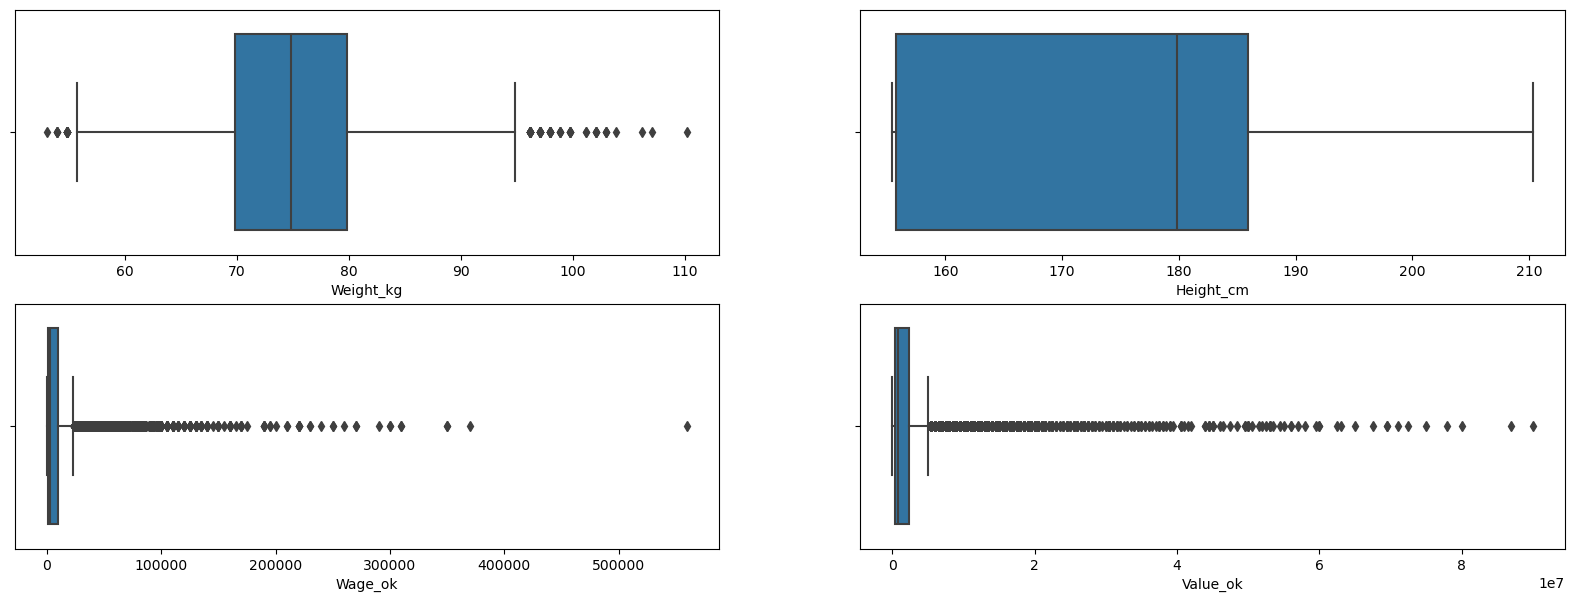

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,7))

sns.boxplot(x='Weight_kg',  data=df_fifa, ax=axs[0,0])
sns.boxplot(x='Height_cm',  data=df_fifa, ax=axs[0,1])
sns.boxplot(x='Wage_ok',  data=df_fifa, ax=axs[1,0])
sns.boxplot(x='Value_ok',  data=df_fifa, ax=axs[1,1])


<Axes: xlabel='Categoría_Posición', ylabel='Value_ok'>

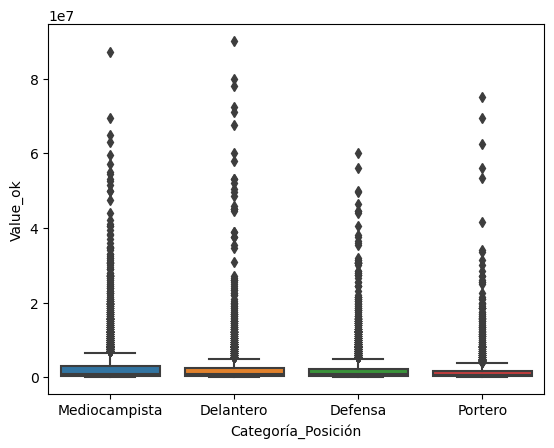

In [42]:
sns.boxplot(y='Value_ok', x='Categoría_Posición' , data=df_fifa )

C:\Users\manue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Value_ok', ylabel='Count'>

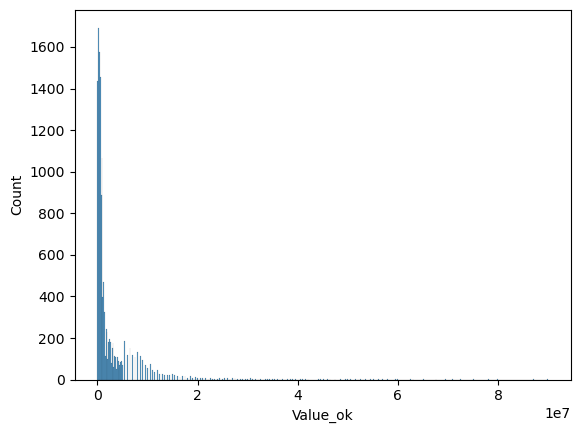

In [44]:
sns.histplot( x='Value_ok' , data=df_fifa )

C:\Users\manue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Wage_ok', ylabel='Count'>

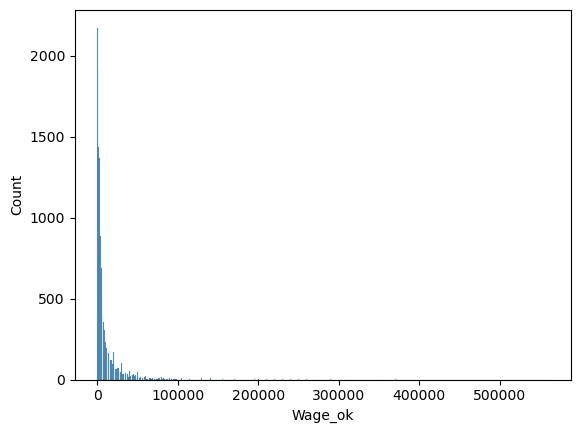

In [46]:
sns.histplot( x='Wage_ok' , data=df_fifa )

# Análisis descriptivo- Una vez tenemos nuestros datos limpios de irregularidades, de valores nulos y erróneos podemos emepezar a analizar su contenido
- Compara las variables numéricas en función de variables categóricas, como su posición. Respóndete a preguntas tales como qué jugadores son más caros, más altos... Para ello representa una tabla con la suma, la media y la cuenta para cada posición. También dibuja un gráfico que consideres el más conveniente para analizar la misma información visualmente. 
- OVA representa una valoración general del jugador, analiza si tiene alguna relación con otras columnas referentes a la calidad como Attacking, Defending... A mayor OVA mayor Value?ue?

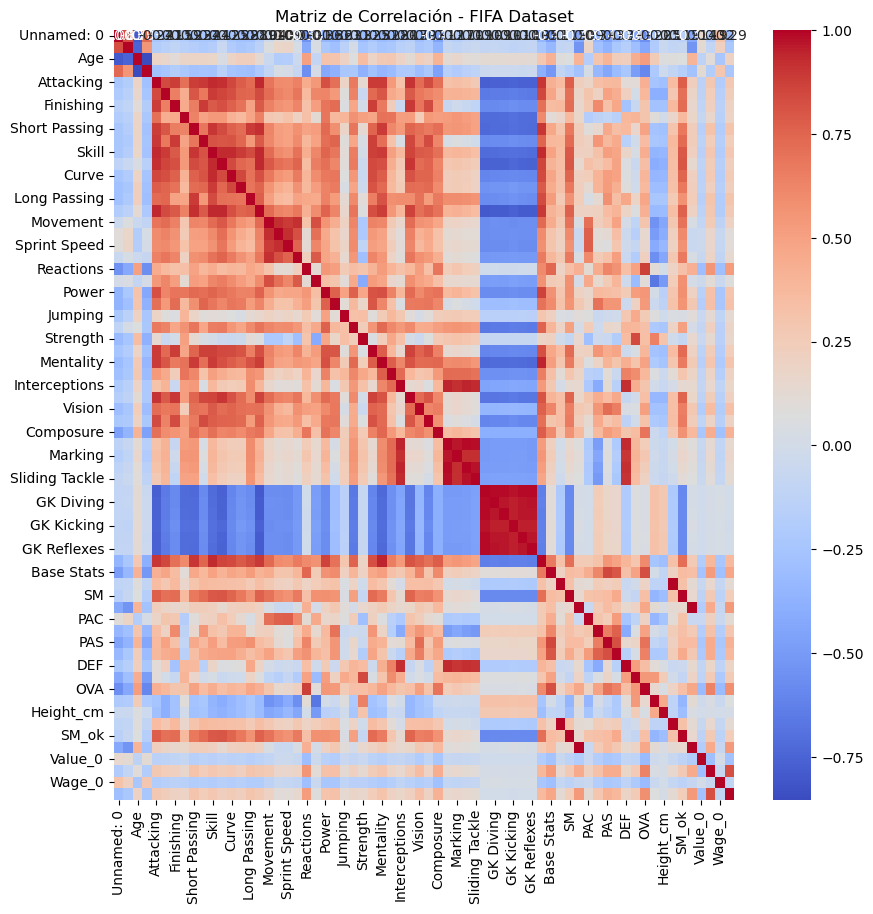

In [108]:
df_fifa_numeric = df_fifa.select_dtypes(include=["number"])



matriz = df_fifa_numeric.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(matriz, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - FIFA Dataset")
plt.show()


In [98]:
df_fifa_numeric.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13700 entries, 0 to 13699
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        13700 non-null  int64  
 1   ID                13700 non-null  int64  
 2   Age               13700 non-null  int64  
 3   Growth            13700 non-null  int64  
 4   Attacking         13700 non-null  int64  
 5   Crossing          13700 non-null  int64  
 6   Finishing         13700 non-null  int64  
 7   Heading Accuracy  13700 non-null  int64  
 8   Short Passing     13700 non-null  int64  
 9   Volleys           13700 non-null  float64
 10  Skill             13700 non-null  int64  
 11  Dribbling         13700 non-null  int64  
 12  Curve             13700 non-null  float64
 13  FK Accuracy       13700 non-null  int64  
 14  Long Passing      13700 non-null  int64  
 15  Ball Control      13700 non-null  int64  
 16  Movement          13700 non-null  int64 

In [56]:
df_fifa['OVA']

0        64
1        77
2        80
3        59
4        65
         ..
13695    60
13696    59
13697    76
13698    63
13699    60
Name: OVA, Length: 13700, dtype: int64

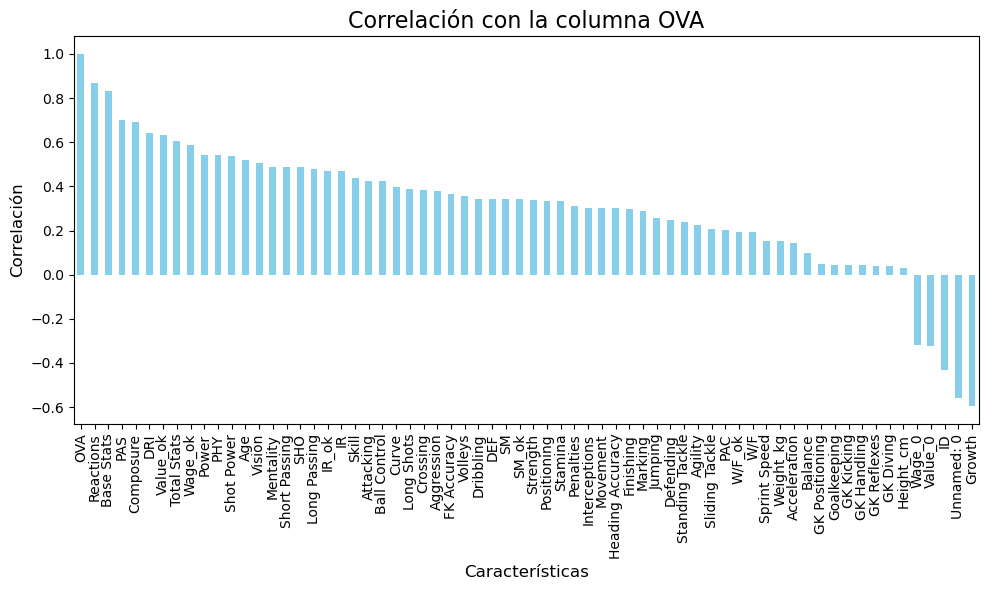

In [94]:
corr_OVA = df_fifa_numeric.corr()['OVA'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
corr_OVA.plot(kind='bar', color='skyblue')
plt.title('Correlación con la columna OVA', fontsize=16)
plt.xlabel('Características', fontsize=12)
plt.ylabel('Correlación', fontsize=12)

plt.tight_layout()
plt.show()